In [1]:
import pandas as pd
import os
from pathlib import Path
import seaborn as sns

In [2]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

# Структура данных:

Данные записываются для каждого пользователя, совершившего покупки, каждый день
- для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
- внутри каждой папки есть файл `data.csv`, где и хранятся данные

Схематично выглядит так:

└── data

   ├── 2020-12-30
   
   │  ├── FirstName_LastName1
   
   │  │   └── data.csv
   
   │  ├── FirstName_LastName2
   
   │  │   └── data.csv
   
   │  └── FirstName_LastName3
   
   │      └── data.csv
   
   └── 2020-12-31
   
      ├── FirstName_LastName1
      
      │   └── data.csv
      
      └── FirstName_LastName5
      
          └── data.csv

Например:
- 30 декабря три покупателя сделали покупки,
- 31 – два 

(папки `2020-12-30` и `2020-12-31` соответственно).

Поскольку клиент `FirstName_LastName1` купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.

***Note:*** данные в задании покрывают другой временной период, имена тоже другие. Подробности, примеры и возможные подсказки можно найти в текстах следующих шагов.

## Задачи
1. Соберите все данные из папки `data` в один датафрэйм, имеющий следующие столбцы:
    - колонки из самих файлов (`product_id`, `quantity`),
    - а также имя пользователя (`name`),
    - и дата этих покупок (`date`), соответствует названию папки, где лежит папка с пользователем)
2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.
3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с `product_id==56`?
4. Визуализируйте продажи по дням.
5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым `product_id`, совершенную в разные дни. 
Найти данные можно либо на JupyterHub, либо скачать архив `4_data.zip`

## 1. 💀 Сложное задание! 💀

Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы:
- колонки из самих файлов (`product_id`, `quantity`),
- имя пользователя (`name`),
- и дату этих покупок (`date`), соответствует названию папки, где лежит папка с пользователем).

*Для объединения датафреймов, читаемых из файлов, можно использовать метод* `pd.concat()`

```Python
df = pd.concat([df_1, df_2])

```
*Обратите внимание: индексы повторяются, поэтому после соединения всех данных нужно их сбросить.*

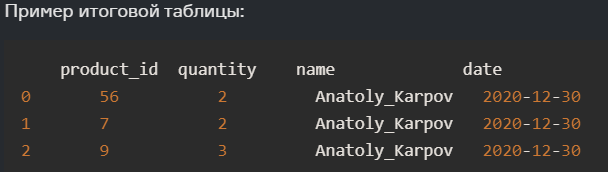

### В качестве ответа укажите сумму по колонке `quantity`.

Также могут пригодиться:

- Просмотр содержимого папок
- Циклы
- Сбросить индексы
- Присоединить датафрейм

In [3]:
start_path = 'C:/Users/A/Karpov_View/4_data/'
start_path

'C:/Users/A/Karpov_View/4_data/'

In [4]:
# start_df = pd.DataFrame(columns=['Unnamed: 0', 'product_id', 'quantity', 'name', 'date'])
start_df = pd.DataFrame()

In [5]:
for date in os.listdir(start_path):
    for name in os.listdir(start_path + date):
        data_path = start_path + date + r'/' + name + '/data.csv'
        temp_df = pd.read_csv(data_path)
        temp_df['name'] = name
        temp_df['date'] = date
        start_df = pd.concat((start_df, temp_df))

In [6]:
start_df.quantity.sum()

480

In [7]:
start_df = start_df.drop('Unnamed: 0', axis=1).reset_index(drop=True)
start_df.head()

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03


### pathlib
https://www.youtube.com/watch?v=EBUDRRQJbB4

https://www.youtube.com/watch?v=mpI0joniKvA

In [8]:
start_path = Path('C:/Users/A/Karpov_View/4_data/')
df = pd.DataFrame()

for path_csv in start_path.glob('**/*.csv'):
    temp_df = pd.read_csv(path_csv)
    date = path_csv.parts[-3]
    name = path_csv.parts[-2]
    temp_df['date'] = date
    temp_df['name'] = name
    df = pd.concat((df, temp_df))

df.quantity.sum()

480

In [9]:
df = df.drop('Unnamed: 0', axis=1).reset_index(drop=True)
df.head()

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov


## 2.
Выясните, какой пользователь купил больше всего товаров.

Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

*Например:*

> Anatoly_Karpov, Nekto_Ktotovich, Lena_Uhanova, Ignat, Sasha_Tokarev

In [10]:
result = (df.groupby('name')
              .quantity.sum()
              .sort_values(ascending=False)
              .index[:2])

In [11]:
print(*result, sep=', ')

Alexey_Smirnov, Petr_Smirnov


## 3.
Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, `sns.barplot`), где:

- по оси x – идентификаторы товаров (`product_id`) 
- по оси y – суммарное число их покупок (сколько товаров с таким `product_id` было продано)
- Для практики попробуйте изменить параметры графика: цвет (`color`), прозрачность (`alpha`), сортировку значений по оси х (`order`). 

В качестве ответа укажите, сколько было продано единиц товара с `product_id` равным **56** (`product_id==56`).

In [12]:
data = (df.groupby('product_id')
            .quantity.sum()
            .sort_values(ascending=False)
            .head(10)
)
data

product_id
27    20
56    18
24    15
74    15
41    14
34    13
94    13
66    13
92    12
50    12
Name: quantity, dtype: int64

<AxesSubplot:xlabel='product_id'>

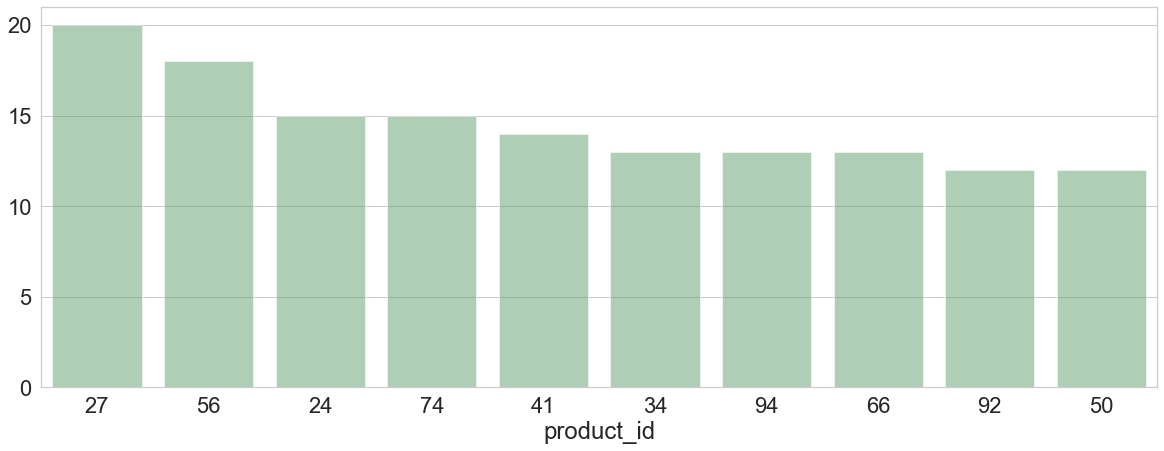

In [13]:
sns.barplot(x=data.index,
            y=data.values,
            color='g',
            alpha=0.5,
            order=data.index)

In [14]:
data.loc[56]

18

## 4. Посмотрим на продажи по дням!
Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (`date`).



In [15]:
sells_for_days = (df
                  .groupby('date', as_index=False)
                  .agg({'quantity': 'sum'})
                 )
sells_for_days

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


<AxesSubplot:xlabel='date', ylabel='quantity'>

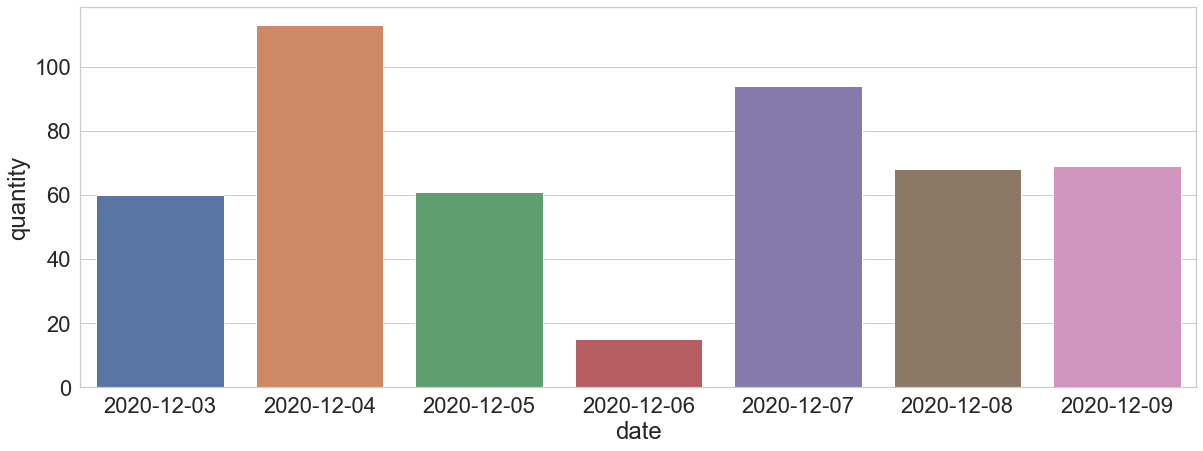

In [16]:
sns.barplot(data=sells_for_days,
            x='date',
            y='quantity'
           )

Далее выберите верные утверждения:
- Меньше всего товаров было приобретено 6 декабря
- ~~5 декабря было куплено почти в два раза больше товаров, чем в предыдущий день~~
- 4 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
- ~~7 декабря было куплено почти в два раза больше товаров, чем в предыдущий день~~
- ~~5 декабря было куплено почти в три раза меньше товаров, чем в предыдущий день~~
- ~~Меньше всего продуктов было приобретено 4 декабря~~
- Максимальное число товаров было продано 4 декабря
- 8 и 9 декабря было продано примерно одинаковое число товаров

## 5. 💀 Сложное задание! 💀

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым `product_id`, совершенную в разные дни. 

Например, пользователь `Sasha Tsarev` дважды приобрел товар 6. Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет. `Katya Skriptsova` также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается.
    
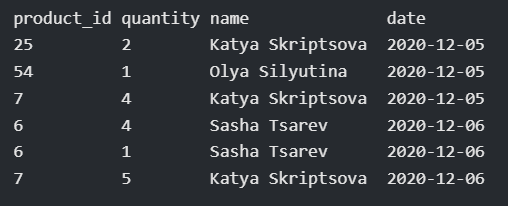
  
*Может пригодиться*: `.drop_duplicates()`

In [17]:
df.date = pd.to_datetime(df.date)
df.dtypes

product_id             int64
quantity               int64
date          datetime64[ns]
name                  object
dtype: object

In [18]:
(df
     .drop_duplicates(['product_id', 'date', 'name'])
     .groupby(['name', 'product_id'])
     .date.count()
     .sort_values()
     .tail()
)

name            product_id
Anton_Smirnov   33            1
                6             1
Vasiliy_Petrov  78            1
Petr_Fedorov    94            2
Anton_Ivanov    15            2
Name: date, dtype: int64

In [19]:
(df
     .groupby(['name', 'product_id'])
     .agg({'date': 'nunique'})
     .query('date > 1')
)

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
